### Data Analysis of Aircrafts Crashes & Fatalities Over A Period of 101 Years

Source: https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
air = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
#Check the first 5 rows
air.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [4]:
#Examine the number of rows, columns
air.shape

(5268, 13)

In [5]:
#The columns
air.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [6]:
#The data types and info
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            3049 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [7]:
#Check for the number of missing/corrupt data in each columns
air.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [8]:
#Missing data within columns in ascending order
air.isnull().sum().sort_values(ascending=False)

Flight #        4199
Time            2219
Route           1706
cn/In           1228
Summary          390
Registration     335
Type              27
Ground            22
Aboard            22
Location          20
Operator          18
Fatalities        12
Date               0
dtype: int64

#### From above, Flight column has the most missing data

In [9]:
#Investigating Flight column and its information
air['Flight #'].unique()

array([nan, '-', '7', '599', '6', '4', '1', '14', '34', '23', '15A',
       'LZ 129', '2', '8', '9', '229', '19', '16', '21', '203', '5', '3',
       '71', '7208', '28', '13', 'V-1104', '9035', '2L272', '63', '218',
       '161', '6001', '142', '45', '216', '42', '105', '16B', '6-103',
       '513', '878', '850', '942', '404', '44', '2207', '6963', '665',
       '521', '605', '410', '121', '311', '608', '923', '1629', '10',
       '009', '572', '611', '700', '4422', '1-10', '624', '421', '6427',
       '100', '897R', '557', '11-8', '537', '157', '500', '307', '2501',
       '903', '32', '245', '115', '83', '493', '129', '151', '610', '615',
       'CAM5763', '44-2', '501', '324', '6780', '101', '841', '4-2',
       '526A', '416W', '202', '251', '201', '1-6-6A', '470', '162', '636',
       '783/057', '318', '512', '723', '627', '304/44', '781', '314',
       '152', '633', '57', '792', '451', '4844-C', '329', '260', '626',
       '711', '845/26', '560', '402/46', '24', '409', '629', '17K

In [10]:
#Drop the Flight column because of multitude of unknown data, and its various forms
air.drop('Flight #', axis=1, inplace=True)

In [11]:
air.dtypes

Date             object
Time             object
Location         object
Operator         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object

In [12]:
#convert date column in string to date data type
air.Date = pd.to_datetime(air.Date)

In [13]:
#Now in date data type, check
air.Date.dtype

dtype('<M8[ns]')

In [14]:
#Convert Fatalities columns to integer from float
air.Fatalities = air.Fatalities.astype(int, errors='ignore')

#### Conversion of Fatalities column not possible because of missing data

In [15]:
#Examining the missing data in the Fatalities column
air[air.Fatalities.isnull()]

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
26,1919-10-20,NaN,English Channel,Aircraft Transport and Travel,NaN,De Havilland DH-4,G-EAHG,NaN,NaN,NaN,NaN,NaN
333,1934-08-10,NaN,"Ningbo, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NaN,NaN,NaN,NaN,NaN,NaN
364,1935-08-13,NaN,"Hangow, China",China National Aviation Corporation,NaN,Sikorsky S-38B,NV40V,NaN,NaN,NaN,NaN,Destoryed in a storm.
423,1936-12-26,NaN,"Nanking, China",China National Aviation Corporation,NaN,Douglas DC-2,NC14269,NaN,NaN,NaN,NaN,NaN
537,1940-07-07,NaN,Gulf of Tonkin,Air France,NaN,Dewoitine D-338,F-AQBA,1,NaN,NaN,NaN,Shot down by a Japanese military fighter.
570,1942-01-24,NaN,"Near Samarinda, Borneo",KNILM,NaN,Douglas DC-3,PK-AFW,1982,NaN,NaN,NaN,Shot down by Japanese military aircraft.
571,1942-01-26,NaN,"Kupang, Timor",KNILM,NaN,Grumman G-21 Goose,PK-AFS,1081,NaN,NaN,NaN,Shot down by Japanese military aircraft.
573,1942-02-14,NaN,NaN,China National Aviation Corporation,NaN,Douglas DC-2,45,NaN,NaN,NaN,NaN,NaN
593,1942-10-01,NaN,"Kunming, China",China National Aviation Corporation,NaN,Douglas C-47,69,NaN,NaN,NaN,NaN,Crashed while attempting to land after losing ...
678,1944-11-09,NaN,"Seljord, Norway",Military - U.S. Army Air Corps,NaN,NaN,42-52196,NaN,NaN,NaN,NaN,NaN


In [16]:
#Dropping missing values in Aboard and Fatalities columns, their missing values occur almost together
air.dropna(subset=[['Aboard', 'Fatalities']], axis=0, inplace=True)

In [17]:
#Convert Aboard and Fatalities columns from float to integer
air[['Aboard', 'Fatalities']] = air[['Aboard', 'Fatalities']].astype(int)

In [18]:
air.dtypes

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                   int32
Fatalities               int32
Ground                 float64
Summary                 object
dtype: object

In [19]:
air.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Registration',
       'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [20]:
# Splitting the Date column into Year, Month and Day into their respective
air['Year'] = pd.DatetimeIndex(air['Date']).year
air['Month'] = pd.DatetimeIndex(air['Date']).month
air['Day'] = pd.DatetimeIndex(air['Date']).day

In [21]:
#Examining the foremost head data once again, with the new columns showing
air.head()

,Date,Time,Location,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Year,Month,Day
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,0.0,"During a demonstration flight, a U.S. Army fly...",1908,9,17
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,5,0.0,First U.S. dirigible Akron exploded just offsh...,1912,7,12
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,1,0.0,The first fatal airplane accident in Canada oc...,1913,8,6
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0.0,The airship flew into a thunderstorm and encou...,1913,9,9
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0.0,Hydrogen gas which was being vented was sucked...,1913,10,17


#### Examining the Location column

In [22]:
air.Location.head(10)

0                   Fort Myer, Virginia
1               AtlantiCity, New Jersey
2    Victoria, British Columbia, Canada
3                    Over the North Sea
4            Near Johannisthal, Germany
5                       Tienen, Belgium
6                 Off Cuxhaven, Germany
7                 Near Jambol, Bulgeria
8                   Billericay, England
9                  Potters Bar, England
Name: Location, dtype: object

In [23]:
#Spliting the string in Location column, solely because ',' is common as the separator between location and Country
split = air.Location.str.split(pat=',' , n=1, expand=True)

In [24]:
split.head(10)

,0,1
0,Fort Myer,Virginia
1,AtlantiCity,New Jersey
2,Victoria,"British Columbia, Canada"
3,Over the North Sea,None
4,Near Johannisthal,Germany
5,Tienen,Belgium
6,Off Cuxhaven,Germany
7,Near Jambol,Bulgeria
8,Billericay,England
9,Potters Bar,England


In [25]:
#Assigning the two new columns names with the aim of inserting them in the 'air' dataframe
air.Location = split[0]
air['Area_Country'] = split[1]

In [26]:
#Re-ordering the columns, and dropping the Date column
air = air.reindex_axis(['Day', 'Month', 'Year', 'Time', 'Location', 'Area_Country', 'Operator', 'Route', 'Type', 'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'], axis=1)

In [27]:
air.head(10)

,Day,Month,Year,Time,Location,Area_Country,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,17,9,1908,17:18,Fort Myer,Virginia,Military - U.S. Army,Demonstration,Wright Flyer III,NaN,1,2,1,0.0,"During a demonstration flight, a U.S. Army fly..."
1,12,7,1912,06:30,AtlantiCity,New Jersey,Military - U.S. Navy,Test flight,Dirigible,NaN,NaN,5,5,0.0,First U.S. dirigible Akron exploded just offsh...
2,6,8,1913,NaN,Victoria,"British Columbia, Canada",Private,NaN,Curtiss seaplane,NaN,NaN,1,1,0.0,The first fatal airplane accident in Canada oc...
3,9,9,1913,18:30,Over the North Sea,None,Military - German Navy,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0.0,The airship flew into a thunderstorm and encou...
4,17,10,1913,10:30,Near Johannisthal,Germany,Military - German Navy,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0.0,Hydrogen gas which was being vented was sucked...
5,5,3,1915,01:00,Tienen,Belgium,Military - German Navy,NaN,Zeppelin L-8 (airship),NaN,NaN,41,21,0.0,Crashed into trees while attempting to land af...
6,3,9,1915,15:20,Off Cuxhaven,Germany,Military - German Navy,NaN,Zeppelin L-10 (airship),NaN,NaN,19,19,0.0,"Exploded and burned near Neuwerk Island, when..."
7,28,7,1916,NaN,Near Jambol,Bulgeria,Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20,20,0.0,"Crashed near the Black Sea, cause unknown."
8,24,9,1916,01:00,Billericay,England,Military - German Navy,NaN,Zeppelin L-32 (airship),NaN,NaN,22,22,0.0,Shot down by British aircraft crashing in flames.
9,1,10,1916,23:45,Potters Bar,England,Military - German Navy,NaN,Zeppelin L-31 (airship),NaN,NaN,19,19,0.0,Shot down in flames by the British 39th Home D...


In [28]:
#The most and least recent year of the crashes under analysis
print('The most recent Year:', air.Year.max())

print('The least recent Year:', air.Year.min())

The most recent Year: 2009
The least recent Year: 1908


In [29]:
#The range of years under examination
Year_range = air.Year.max() - air.Year.min()
print('The Range of Year Under Review::', Year_range, 'Years')

The Range of Year Under Review:: 101 Years


In [30]:
# Plane Crashes per year, displaying the highest 10
air.Year.value_counts().sort_values(ascending=False).head(10)

1972    104
1968     96
1989     94
1967     91
1973     89
1979     89
1991     88
1994     87
1970     87
1976     86
Name: Year, dtype: int64

#### 1972 had the highest number of aircraft crashes, about 104

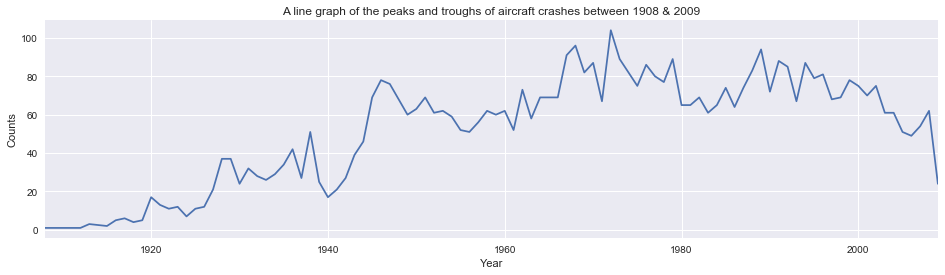

In [31]:
#Showing the aircraft crashes
air.Year.value_counts().sort_index().plot(figsize=(16,4))
plt.title('A line graph of the peaks and troughs of aircraft crashes between 1908 & 2009')
plt.xlabel('Year')
plt.ylabel('Counts')

In [32]:
#Which Months have the highest and the lowest records of aircrashes?
air.Month.value_counts().sort_values(ascending=False)

12    514
1     494
8     472
9     457
11    453
10    452
3     452
7     427
2     394
6     385
4     377
5     369
Name: Month, dtype: int64

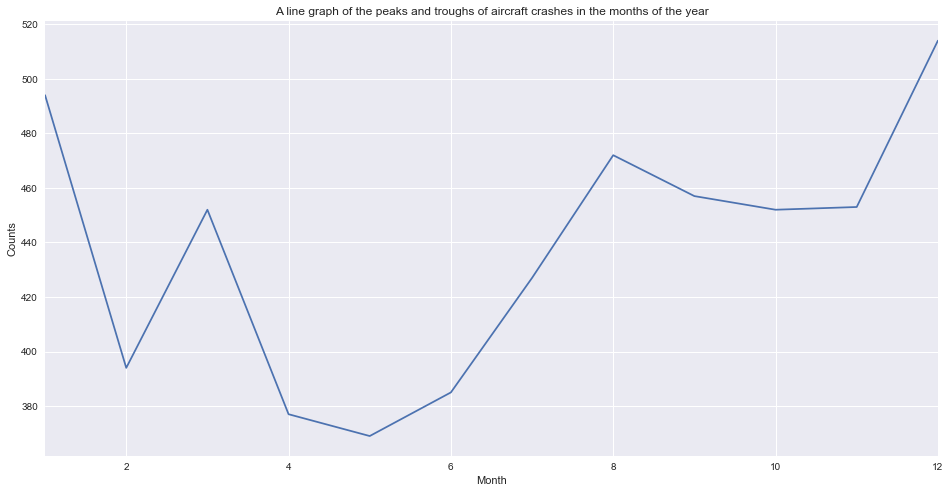

In [33]:
#December and May months of the year have the highest and lowest number of crashes respectively 
air.Month.value_counts().sort_index().plot(figsize=(16,8))
plt.title('A line graph of the peaks and troughs of aircraft crashes in the months of the year')
plt.xlabel('Month')
plt.ylabel('Counts')

#### From the foregoing, the months of December and January had the highest crashes

In [34]:
#air crashes according to the frequency/occurence of days of the month
air.Day.value_counts().sort_values(ascending=False)

8     197
15    196
3     186
22    184
24    181
9     181
21    181
27    181
2     178
6     176
11    176
12    176
17    175
14    173
19    173
10    172
23    167
28    166
25    164
16    163
1     163
18    163
13    162
26    162
30    161
5     159
4     158
7     155
29    151
20    150
31    116
Name: Day, dtype: int64

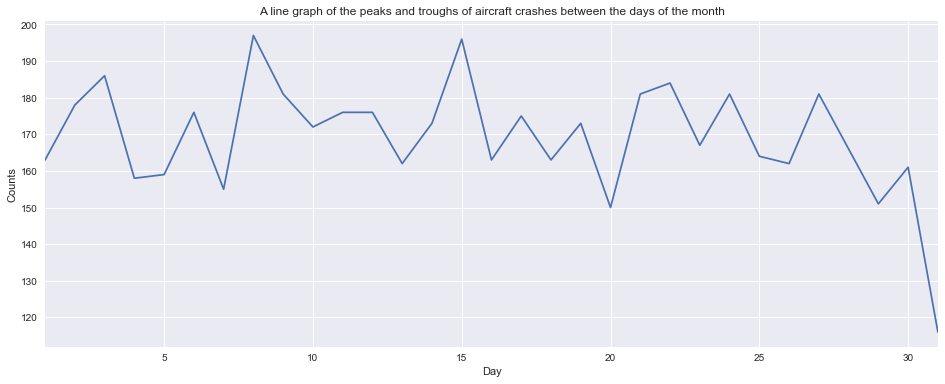

In [35]:
#Examining the frequencies of occurences within the days of the months
air.Day.value_counts().sort_index(ascending=True).plot(figsize=(16,6))
plt.title('A line graph of the peaks and troughs of aircraft crashes between the days of the month')
plt.xlabel('Day')
plt.ylabel('Counts')

#### 8th and 15th days of Months happened to be the day with highest of occurences of aircrashes

In [36]:
#Lowest count of crashes in years
air.Year.value_counts().sort_values(ascending=True).head(20)

1908     1
1912     1
1915     2
1913     3
1918     4
1916     5
1919     5
1917     6
1924     7
1925    11
1922    11
1923    12
1926    12
1921    13
1940    17
1920    17
1927    21
1941    21
2009    24
1930    24
Name: Year, dtype: int64

In [37]:
#Fatalities since 1908; Crashes do not necessarily mean fatalities
air.Fatalities.sort_values(ascending=False).head(10)

2963    583
3568    520
4455    349
2726    346
3562    329
3240    301
3775    290
4916    275
3137    271
3436    269
Name: Fatalities, dtype: int32

In [38]:
#Aircrash fatilities according to year
air[['Year', 'Fatalities']].sort_values(by='Fatalities', ascending=False)

,Year,Fatalities
2963,1977,583
3568,1985,520
4455,1996,349
2726,1974,346
3562,1985,329
3240,1980,301
3775,1988,290
4916,2003,275
3137,1979,271
3436,1983,269


#### Some years show no fatalities, it means only crashes occured but no fatalities; however 1977 shows year with highest fatalities

In [39]:
#Crashes but no fatalities cases
air[air.Fatalities == 0].Fatalities

108     0
387     0
889     0
897     0
1265    0
1359    0
1440    0
1443    0
1610    0
1837    0
1868    0
1885    0
1927    0
1982    0
1983    0
2066    0
2247    0
2266    0
2359    0
2486    0
2590    0
2835    0
3182    0
3307    0
3341    0
3366    0
3417    0
3428    0
3470    0
3541    0
3549    0
3611    0
3767    0
3927    0
3950    0
4068    0
4117    0
4171    0
4199    0
4231    0
4242    0
4273    0
4339    0
4543    0
4553    0
4594    0
4701    0
4748    0
4797    0
4875    0
5057    0
5074    0
5134    0
5178    0
5186    0
5197    0
5217    0
5245    0
Name: Fatalities, dtype: int32

In [40]:
#Total number of crashes but no fatalities aircrashes occurences
air[air.Fatalities == 0].Fatalities.value_counts()

0    58
Name: Fatalities, dtype: int64

In [41]:
#The corresponding years with crashes but no fatalities
air[(air.Fatalities == 0) & (air.Year)]

,Day,Month,Year,Time,Location,Area_Country,Operator,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
889,8,10,1947,07:55,Near El Paso,Texas,American Airlines,New York City - Dallas - Los Angeles,Douglas DC-4,NC90432,10314/DC45,54,0,0.0,"While cruising at 8,000 ft. in clear weather, ..."
897,11,11,1947,NaN,Gallup,New Mexico,American Airlines,San Francisco - Chicago - New York,Douglas DC-6,NC90741,43046/92,25,0,0.0,The aircraft was on a flight from San Francisc...
1265,25,5,1953,15:30,Amsterdam,Netherlands,KLM Royal Dutch Airlines,Amsterdam - Paris,Convair CV-240-4,PH-TEI,125,34,0,2.0,While taking off the plane reached a height of...
1359,19,1,1955,16:25,Des Moines,Iowa,United Air Lines,Newark - Des Moines - Lincoln,Convair CV-340,N73154,180,39,0,0.0,Almost complete loss of elevator control and s...
1610,30,6,1959,10:35,Ishikawa City,"Ryukyu Island, Okinawa",Military - U.S. Air Force,NaN,North American F-100D-25NA,55-3633A,NaN,1,0,17.0,The pilot ejected and parachuted safely from t...
1837,28,2,1963,21:29,Boston,Massachusetts,Eastern Air Lines,NaN,Douglas DC-7,N842D,454448/944,26,0,1.0,"With engines idling, a girl ran into the No. 2..."
1868,21,8,1963,12:15,Near Leningrad,Russia,Aeroflot,Tallinn - Moscow,Tupelov Tu-124,CCCP-45021,2350701,52,0,0.0,After the landing gear did not retract after ...
1885,17,12,1963,23:41,Los Angeles,California,Western Airlines,NaN,Douglas DC-6B,N93131,45536,46,0,0.0,The No 1. and No2. Engine propellers touched ...
1982,28,6,1965,13:10,San Francisco,California,Pan American World Airways,San Francisco - Hawaii,Boeing B-707-321B,N761PA,18336,153,0,0.0,Just after the aircraft took off from San Fran...
1983,1,7,1965,05:29,Kansas City,Missouri,Continental Airlines,"Los Angeles - Kansas City, MO",Boeing B-707-124,N70773,17609/25,66,0,0.0,The aircraft slid off the end of the runway wh...


In [42]:
#The years of no fatalities, though there were crashes
air[(air.Fatalities == 0 & air.Year)].Year

108     1926
387     1936
889     1947
897     1947
1265    1953
1359    1955
1440    1956
1443    1956
1610    1959
1837    1963
1868    1963
1885    1963
1927    1964
1982    1965
1983    1965
2066    1966
2247    1968
2266    1968
2359    1969
2486    1971
2590    1972
2835    1975
3182    1979
3307    1981
3341    1982
3366    1982
3417    1983
3428    1983
3470    1984
3541    1985
3549    1985
3611    1986
3767    1988
3927    1990
3950    1990
4068    1991
4117    1992
4171    1993
4199    1993
4231    1994
4242    1994
4273    1994
4339    1995
4543    1998
4553    1998
4594    1998
4701    2000
4748    2000
4797    2001
4875    2002
5057    2005
5074    2005
5134    2007
5178    2007
5186    2008
5197    2008
5217    2008
5245    2009
Name: Year, dtype: int64

In [43]:
#Number Aboard in the Year of air crashes but no fatalities
air[(air.Fatalities == 0 & air.Aboard)].Aboard

108      12
387       6
889      54
897      25
1265     34
1359     39
1440     18
1443     31
1610      1
1837     26
1868     52
1885     46
1927     76
1982    153
1983     66
2066      1
2247      2
2266    107
2359      1
2486    218
2590      1
2835    131
3182     78
3307      0
3341    257
3366      1
3417    172
3428     69
3470    177
3541    274
3549     89
3611      0
3767     45
3927      1
3950     85
4068    129
4117    292
4171      5
4199      3
4231    116
4242      7
4273    160
4339     62
4543      2
4553    127
4594     37
4701    142
4748     88
4797    304
4875      2
5057    309
5074    103
5134     54
5178      4
5186    152
5197     85
5217      8
5245    155
Name: Aboard, dtype: int32

In [44]:
year_ = air[(air.Fatalities == 0 & air.Year)].Year

In [45]:
aboard_ = air[(air.Fatalities == 0 & air.Aboard)].Aboard

In [46]:
#Concatinating the two series(year_ , aboard_ ) together
crashes_but_no_fatalities = pd.concat([year_, aboard_], axis=1)

In [47]:
crashes_but_no_fatalities

,Year,Aboard
108,1926,12
387,1936,6
889,1947,54
897,1947,25
1265,1953,34
1359,1955,39
1440,1956,18
1443,1956,31
1610,1959,1
1837,1963,26


In [48]:
#In descending form, year 2015 had the highest number of Aboard passenger, but no fatalities during the crash
crashes_but_no_fatalities.sort_values(by='Aboard', ascending=False)

,Year,Aboard
5057,2005,309
4797,2001,304
4117,1992,292
3541,1985,274
3341,1982,257
2486,1971,218
3470,1984,177
3417,1983,172
4273,1994,160
5245,2009,155


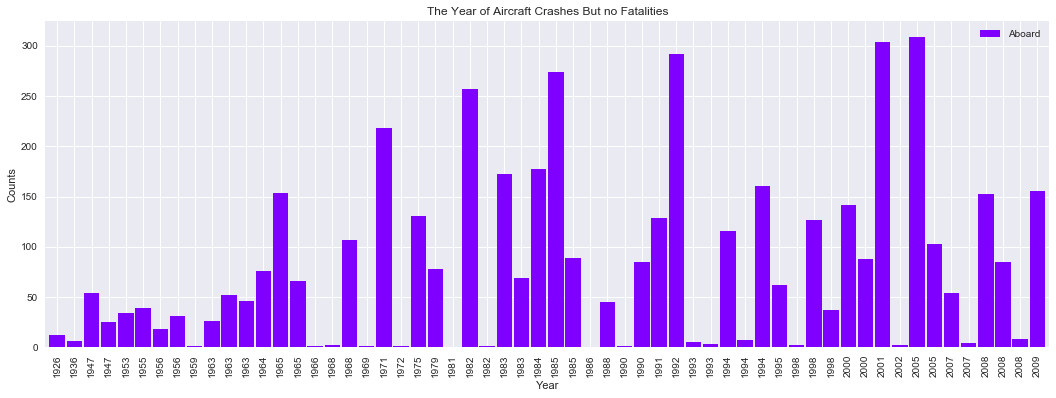

In [49]:
#Plotting the years of no fatalities against their respective years
crashes_but_no_fatalities.plot(x='Year', y='Aboard', kind='bar', figsize=(18,6), colormap='rainbow', grid=True, width=0.9)
plt.title('The Year of Aircraft Crashes But no Fatalities')
plt.xlabel('Year')
plt.ylabel('Counts')